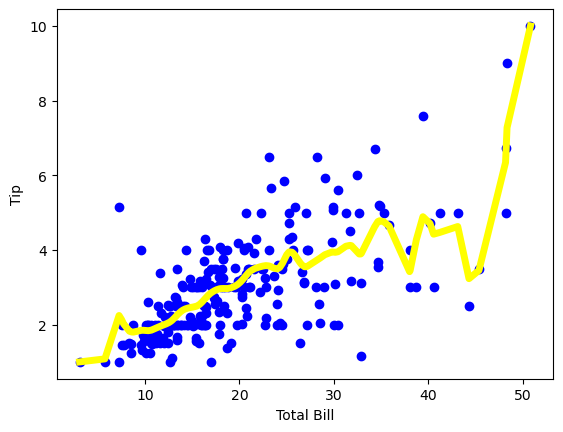

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\10-dataset.csv")
data


# kernel smoothing function
def kernel(point,xmat,k):
  m,n=np.shape(xmat)
  weights=np.mat(np.eye((m)))
  for j in range(m):
    diff=point-x[j]
    weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
  return weights

# function to return local weight of eah traiining example
def localweight(point,xmat,ymat,k):
   wt = kernel(point,xmat,k)
   W = (x.T*(wt*x)).I*(x.T*wt*ymat.T)
   return W

# root function that drives the algorithm
def localWeightRegression(xmat,ymat,k):
  m,n=np.shape(xmat)
  ypred=np.zeros(m)
  for i in range(m):
    ypred[i]=xmat[i]*localweight(xmat[i], xmat, ymat, k)
  return ypred

cola=np.array(data.total_bill)
colb=np.array(data.tip)

mcola=np.mat(cola)
mcolb=np.mat(colb)

m=np.shape(mcolb)[1]
one=np.ones((1,m),dtype=int)
x=np.hstack((one.T,mcola.T))

ypred=localWeightRegression(x,mcolb,0.8)

# plotting the predicted graph
xsort=x.copy()
xsort.sort(axis=0)
plt.scatter(cola,colb,color='blue')
plt.plot(xsort[:, 1],ypred [x[:, 1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()